# **Marketing A/B Test Analysis**

- Data Source: https://www.kaggle.com/datasets/chebotinaa/fast-food-marketing-campaign-ab-test
- Performance Analysis by Test Group
- Statistical Validation of Test Results (ANOVA, Tukey HSD, Effect Size)
- Predictive Modeling with Machine Learning to Identify Key Sales Drivers
- Visualization and Reporting of Experimental Outcomes
- Predictive Modeling (ML)
- Actionable Recommendations for Effective Marketing Strategy
- Business Proposal for Resource Allocation and Next Steps


In [1]:
import pandas as pd
df = pd.read_csv('ab_testing.csv')
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [2]:
import os
import matplotlib.pyplot as plt

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    IMAGES_PATH = os.path.join("images")
    os.makedirs(IMAGES_PATH, exist_ok=True)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
print('df',df.shape)

df (548, 7)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [5]:
df['Promotion'].unique()

array([3, 2, 1])

In [6]:
df['MarketID'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [7]:
print(df.isnull().sum())

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64


In [8]:
print(df.groupby("Promotion")["SalesInThousands"].describe())

           count       mean        std    min      25%     50%      75%    max
Promotion                                                                     
1          172.0  58.099012  16.553782  30.81  46.3525  55.385  63.6175  99.65
2          188.0  47.329415  15.108955  17.34  38.1700  45.385  51.7450  88.64
3          188.0  55.364468  16.766231  22.18  44.1975  51.165  61.7325  96.48


Saving figure sales_distribution_promo_group


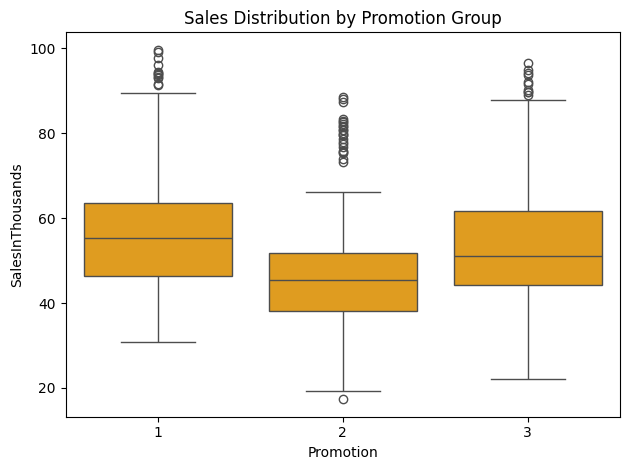

In [9]:
# sales distribution per promotion
import seaborn as sns
sns.boxplot(x="Promotion", y="SalesInThousands", data=df, color='orange')
plt.title("Sales Distribution by Promotion Group")
save_fig("sales_distribution_promo_group")
plt.show()

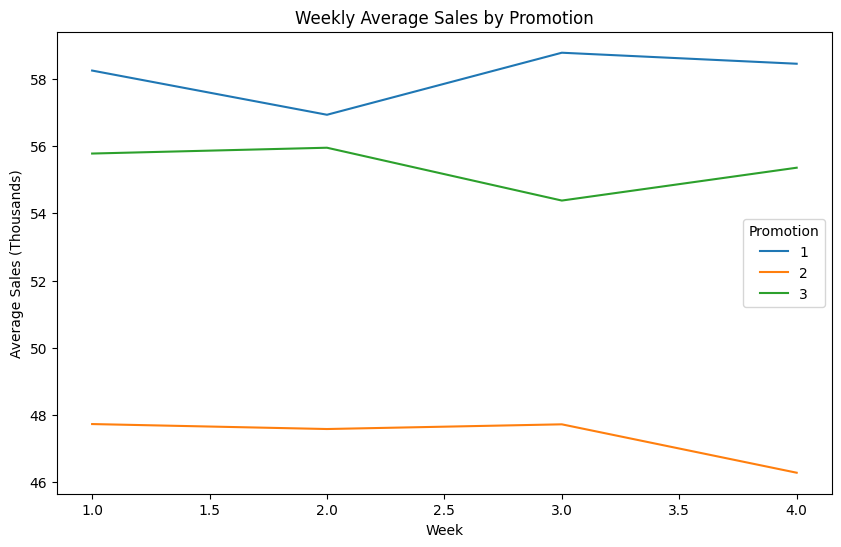

In [10]:
# Check weekly sales trends per promotion

pivot = df.pivot_table(
    index='week',
    columns='Promotion',
    values='SalesInThousands',
    aggfunc='mean'
)

pivot.plot(figsize=(10,6))
plt.title("Weekly Average Sales by Promotion")
plt.ylabel("Average Sales (Thousands)")
plt.xlabel("Week")
plt.legend(title="Promotion")
plt.show()

/var/folders/gv/ldw6vdkx3tn58ym0_xrj0lg00000gn/T/ipykernel_87934/649805938.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Promotion',y='SalesInThousands', hue='MarketSize', data=df, ci=None)


Saving figure avg_sales_by_promotion_marketsize


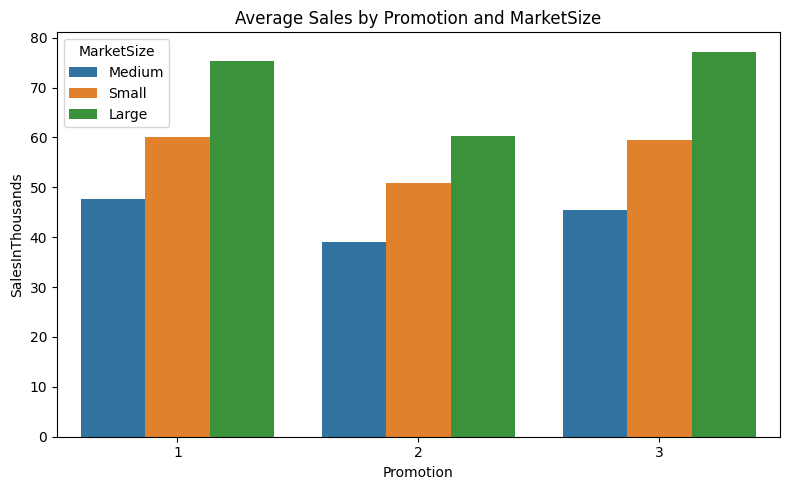

In [11]:
# Check effects of promotions per market size
plt.figure(figsize=(8,5))
sns.barplot(x='Promotion',y='SalesInThousands', hue='MarketSize', data=df, ci=None)
plt.title("Average Sales by Promotion and MarketSize")
save_fig("avg_sales_by_promotion_marketsize")
plt.show()

## Statistical Analysis

### ANOVA

In [12]:
import scipy.stats as stats

anova = stats.f_oneway(
    df[df['Promotion']==1]['SalesInThousands'],
    df[df['Promotion']==2]['SalesInThousands'],
    df[df['Promotion']==3]['SalesInThousands']
)

print("F-statistic:", anova.statistic)
print("p-value:", anova.pvalue)

F-statistic: 21.953485793080677
p-value: 6.765849261408714e-10


The ANOVA yielded a highly significant result (p < 0.0001), indicating that at least one promotion group has a different mean sales outcome.

### Tukey HSD

In [13]:
# identify which groups differ

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=df['SalesInThousands'],
    groups=df['Promotion'],
    alpha=0.05
)

print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------


- Promotion 1 vs Promotion 2: Promotion 2 performed significantly worse, with mean sales approximately 10.8 thousand units higher for Promotion 1 (p < 0.001).

- Promotion 1 vs Promotion 3: No statistically significant difference was found (p = 0.244).

- Promotion 2 vs Promotion 3: Promotion 3 outperformed Promotion 2 by roughly 8.0 thousand units (p < 0.001).

Summary: Promotion 2 consistently underperforms relative to both Promotion 1 and Promotion 3. Promotions 1 and 3 deliver similar sales outcomes, suggesting that Promotion 2 should be deprioritized, while the choice between Promotion 1 and 3 may be made based on other strategic factors such as implementation cost or market fit.

**Business Insight:**

- Promotion 2 should be deprioritized or redesigned, as it systematically yields weaker results.

- Between Promotions 1 and 3, management can make decisions based on non-sales criteria such as cost efficiency, ease of implementation, or brand positioning, since their revenue impact is statistically equivalent.

- At this stage, the analysis provides clear evidence on “what works better” but does not yet explain why the differences exist.

## Forecast Sales with ML model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

categorical_list = ['MarketSize', 'Promotion', 'MarketID']
numeric_list = ['AgeOfStore', 'week']

for col in categorical_list:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('SalesInThousands', axis=1)
y = df['SalesInThousands']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfr = RandomForestRegressor(random_state=42, max_depth=6)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 6.0049752697881855


Saving figure top_10_feature_importances


/var/folders/gv/ldw6vdkx3tn58ym0_xrj0lg00000gn/T/ipykernel_87934/4057727400.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ftr_top10.values, y=ftr_top10.index, palette="pastel")


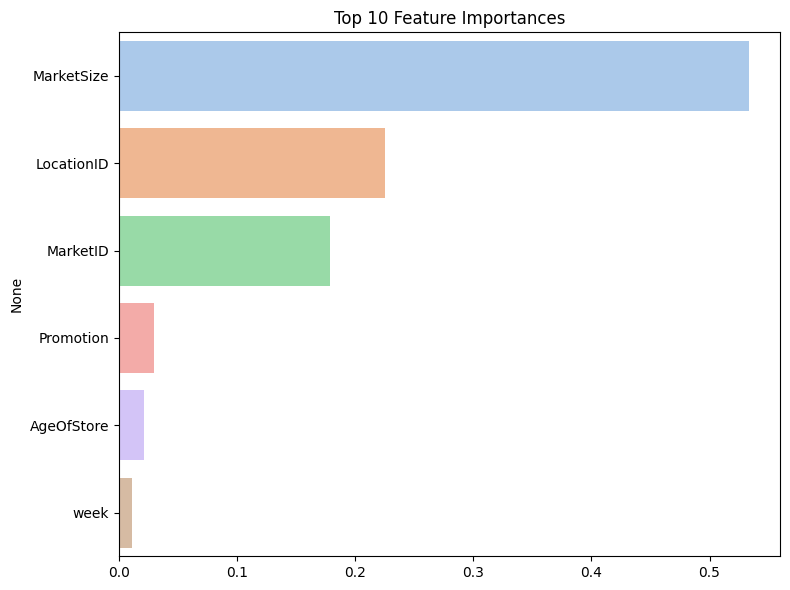

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

ftr_importances = pd.Series(rfr.feature_importances_, index=X_train.columns)
ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
sns.barplot(x=ftr_top10.values, y=ftr_top10.index, palette="pastel")
plt.title("Top 10 Feature Importances")
save_fig("top_10_feature_importances")
plt.show()


#### The Random Forest model achieved reasonable predictive accuracy (RMSE ≈ 6.0), and feature importance analysis revealed that MarketSize and LocationID are the strongest predictors of sales, followed by MarketID. Promotion remains a relevant variable, but its contribution is smaller compared to market and location characteristics.


**Business Insight:**

- Sales performance is driven not only by promotional strategy but also heavily by structural factors such as market size and store location.

- This explains why Promotions 1 and 3 appeared similar in the statistical test: the inherent sales potential of certain markets overshadows the incremental lift from promotions.

- Strategic implication: Promotions should be tailored by market context. For example, Promotion 1 or 3 may deliver stronger ROI in large markets, whereas smaller markets may not justify heavy promotional spend regardless of promotion type.

- The business should adopt a segmented marketing strategy: leverage Promotions 1/3 in high-potential markets, while exploring alternative tactics (e.g., cost reduction, loyalty programs) in smaller or weaker markets.

#### Combined Conclusion

- From statistics (ANOVA + Tukey): Promotion 2 is ineffective and should be deprioritized. Promotions 1 and 3 are interchangeable from a pure sales performance perspective.

- From machine learning: Market size and location drive sales more strongly than promotions themselves. Promotions amplify sales, but their impact is secondary to market fundamentals.

### Final Recommendation

Adopt data-driven promotional allocation: discontinue or rework Promotion 2, and deploy Promotions 1 and 3 selectively in larger and more profitable markets. This ensures marketing spend maximizes incremental revenue rather than being diluted in low-potential locations.